<br>
<br> <center> <font size="7" color=Orange>Milestone 2: Exploratory Data Analysis (EDA)</font> </center> <br/>

<br>
<br> <font size="6" color=Blue>Problem Statement and Background</font> <br/>
<br>

### * We have choosed the dataset of a Telecommunication company and we are going to predict that whether the customer will churn the network or not.
### * We have different attributes like daily call time, night call time, daily recharge etc.
### * On the base of these attributes we are going to predict whether he will churn or not.

<br>
<br> <font size="6" color=Blue>Dataset</font> <br/>
<br>

### * We have taken the Classification Dataset from Kaggle.
### * Here is the link of the Dataset: <a href="url">https://www.kaggle.com/c/customer-churn-prediction-2020/data</a>


<br>
<br> <font size="6" color=Blue>Data Cleaning</font> <br/>
<br>

## Reading the Data

In [126]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
train = pd.read_csv('train.csv')
train.head(5)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


## Columns in the Dataset

In [127]:
train.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Checking if there is any Null value in any Column

In [128]:
print("Null values per Column in Training Dataset:\n",train.isnull().sum(axis = 0))

Null values per Column in Training Dataset:
 state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64


### There is no Null value in the Dataset

## Checking for Duplicates

In [129]:
train[train.duplicated(keep=False)]

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn


### There is no Row that is completely identical

## Datatype per Column

In [130]:
train.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

## Are there categorical columns that should be numerical?

### * Yes there is a column named "churn" that should be numeric when we will use in the machine learning Model

## Is the data in the first few rows consistent with the name of the feature?

### * Yes

## Are there lists or dictionaries packed into one feature?

### * No

## Are dates in the date data type?

### * No

<br>
<br> <font size="6" color=Blue>Visualizations</font> <br/>
<br>

## Box Plot to see Each Numeric Column Data Distribution

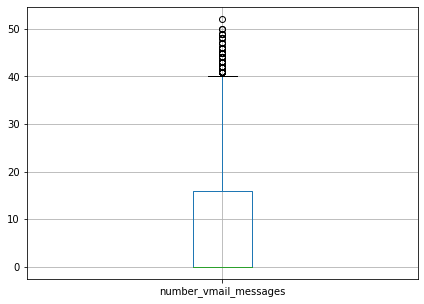

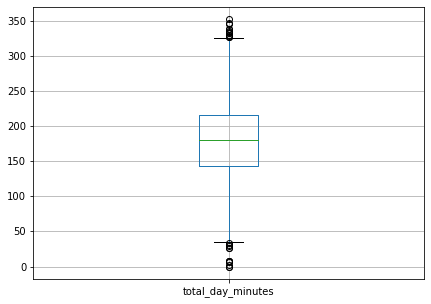

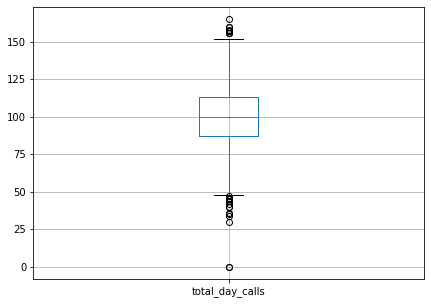

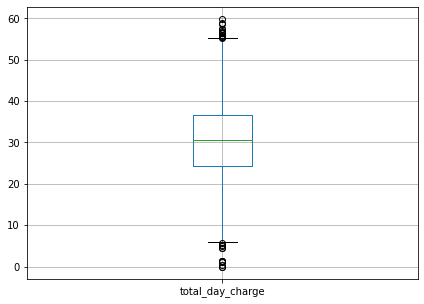

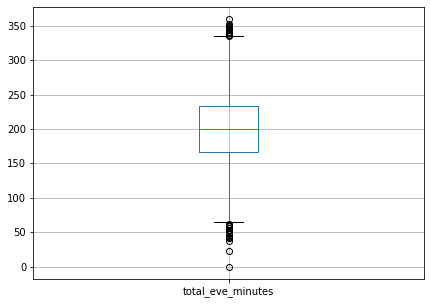

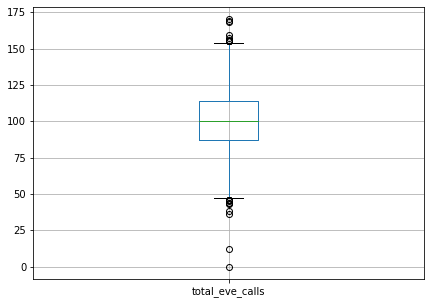

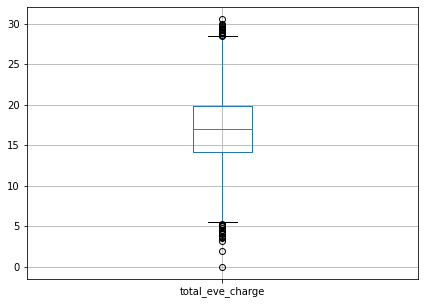

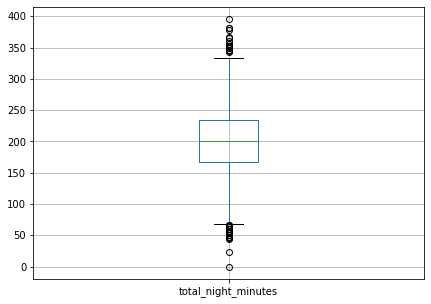

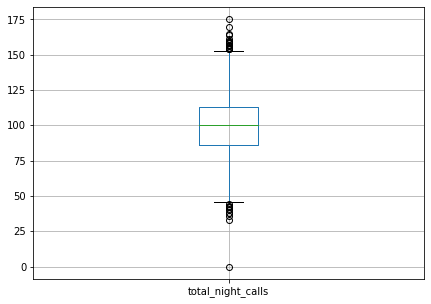

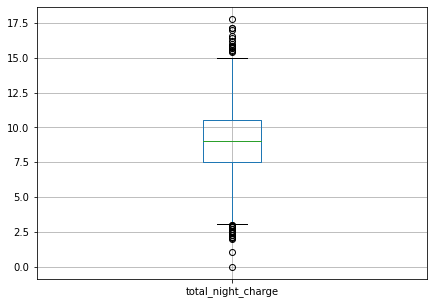

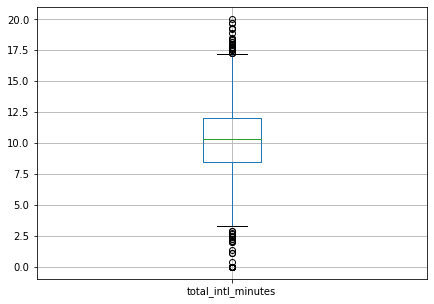

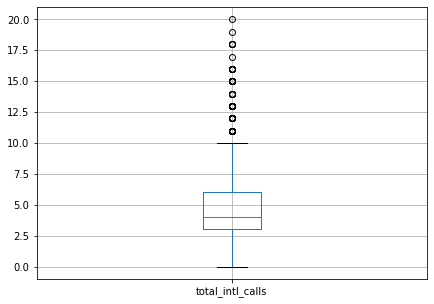

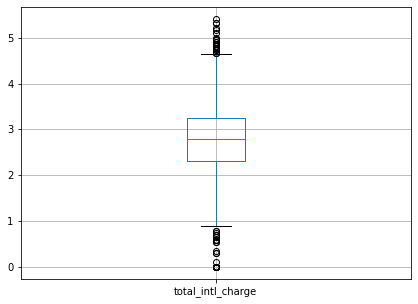

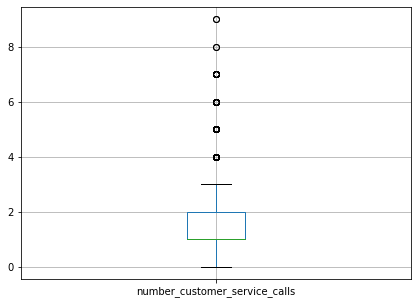

In [131]:
box_df = train[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from pylab import rcParams
import matplotlib.pyplot as plt
rcParams['figure.figsize'] = 7, 5
for column in box_df:
    plt.figure()
    box_df.boxplot([column])

## Categorical: Bar plots

### How many Customers are using international plan given by the Telecommunication COmpany

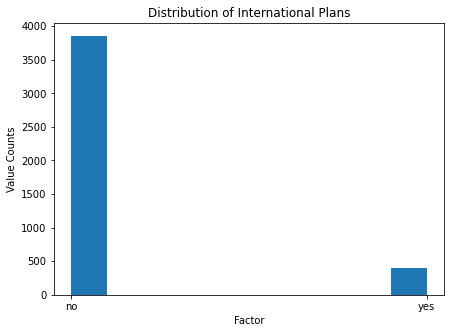

In [168]:
plt.hist(train['international_plan'])
plt.title("Distribution of International Plans")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

### How many Customers are using voice mail plan

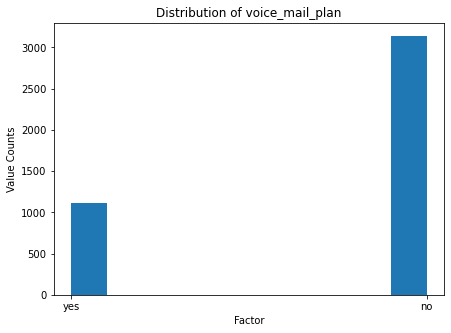

In [169]:
plt.hist(train['voice_mail_plan'])
plt.title("Distribution of voice_mail_plan")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

### How many Customers will Churn

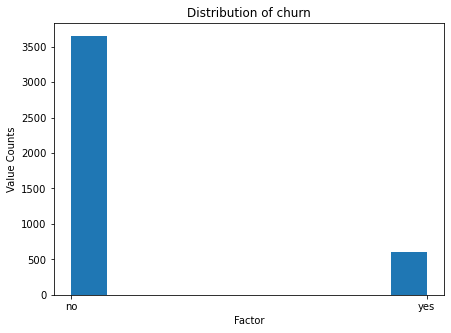

In [170]:
plt.hist(train['churn'])
plt.title("Distribution of churn")
plt.ylabel("Value Counts")
plt.xlabel("Factor")
plt.show()

## Visualizing and Understanding the Data, including understanding:
## How your data is distributed (numerical & categorical)

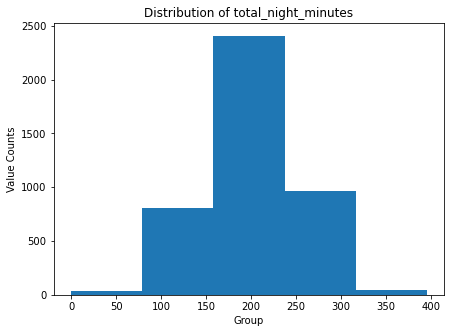

In [171]:
plt.hist(train['total_night_minutes'], 5)
plt.title("Distribution of total_night_minutes")
plt.ylabel("Value Counts")
plt.xlabel("Group")
plt.show()

## How the columns are related? (correlations or other relationships)

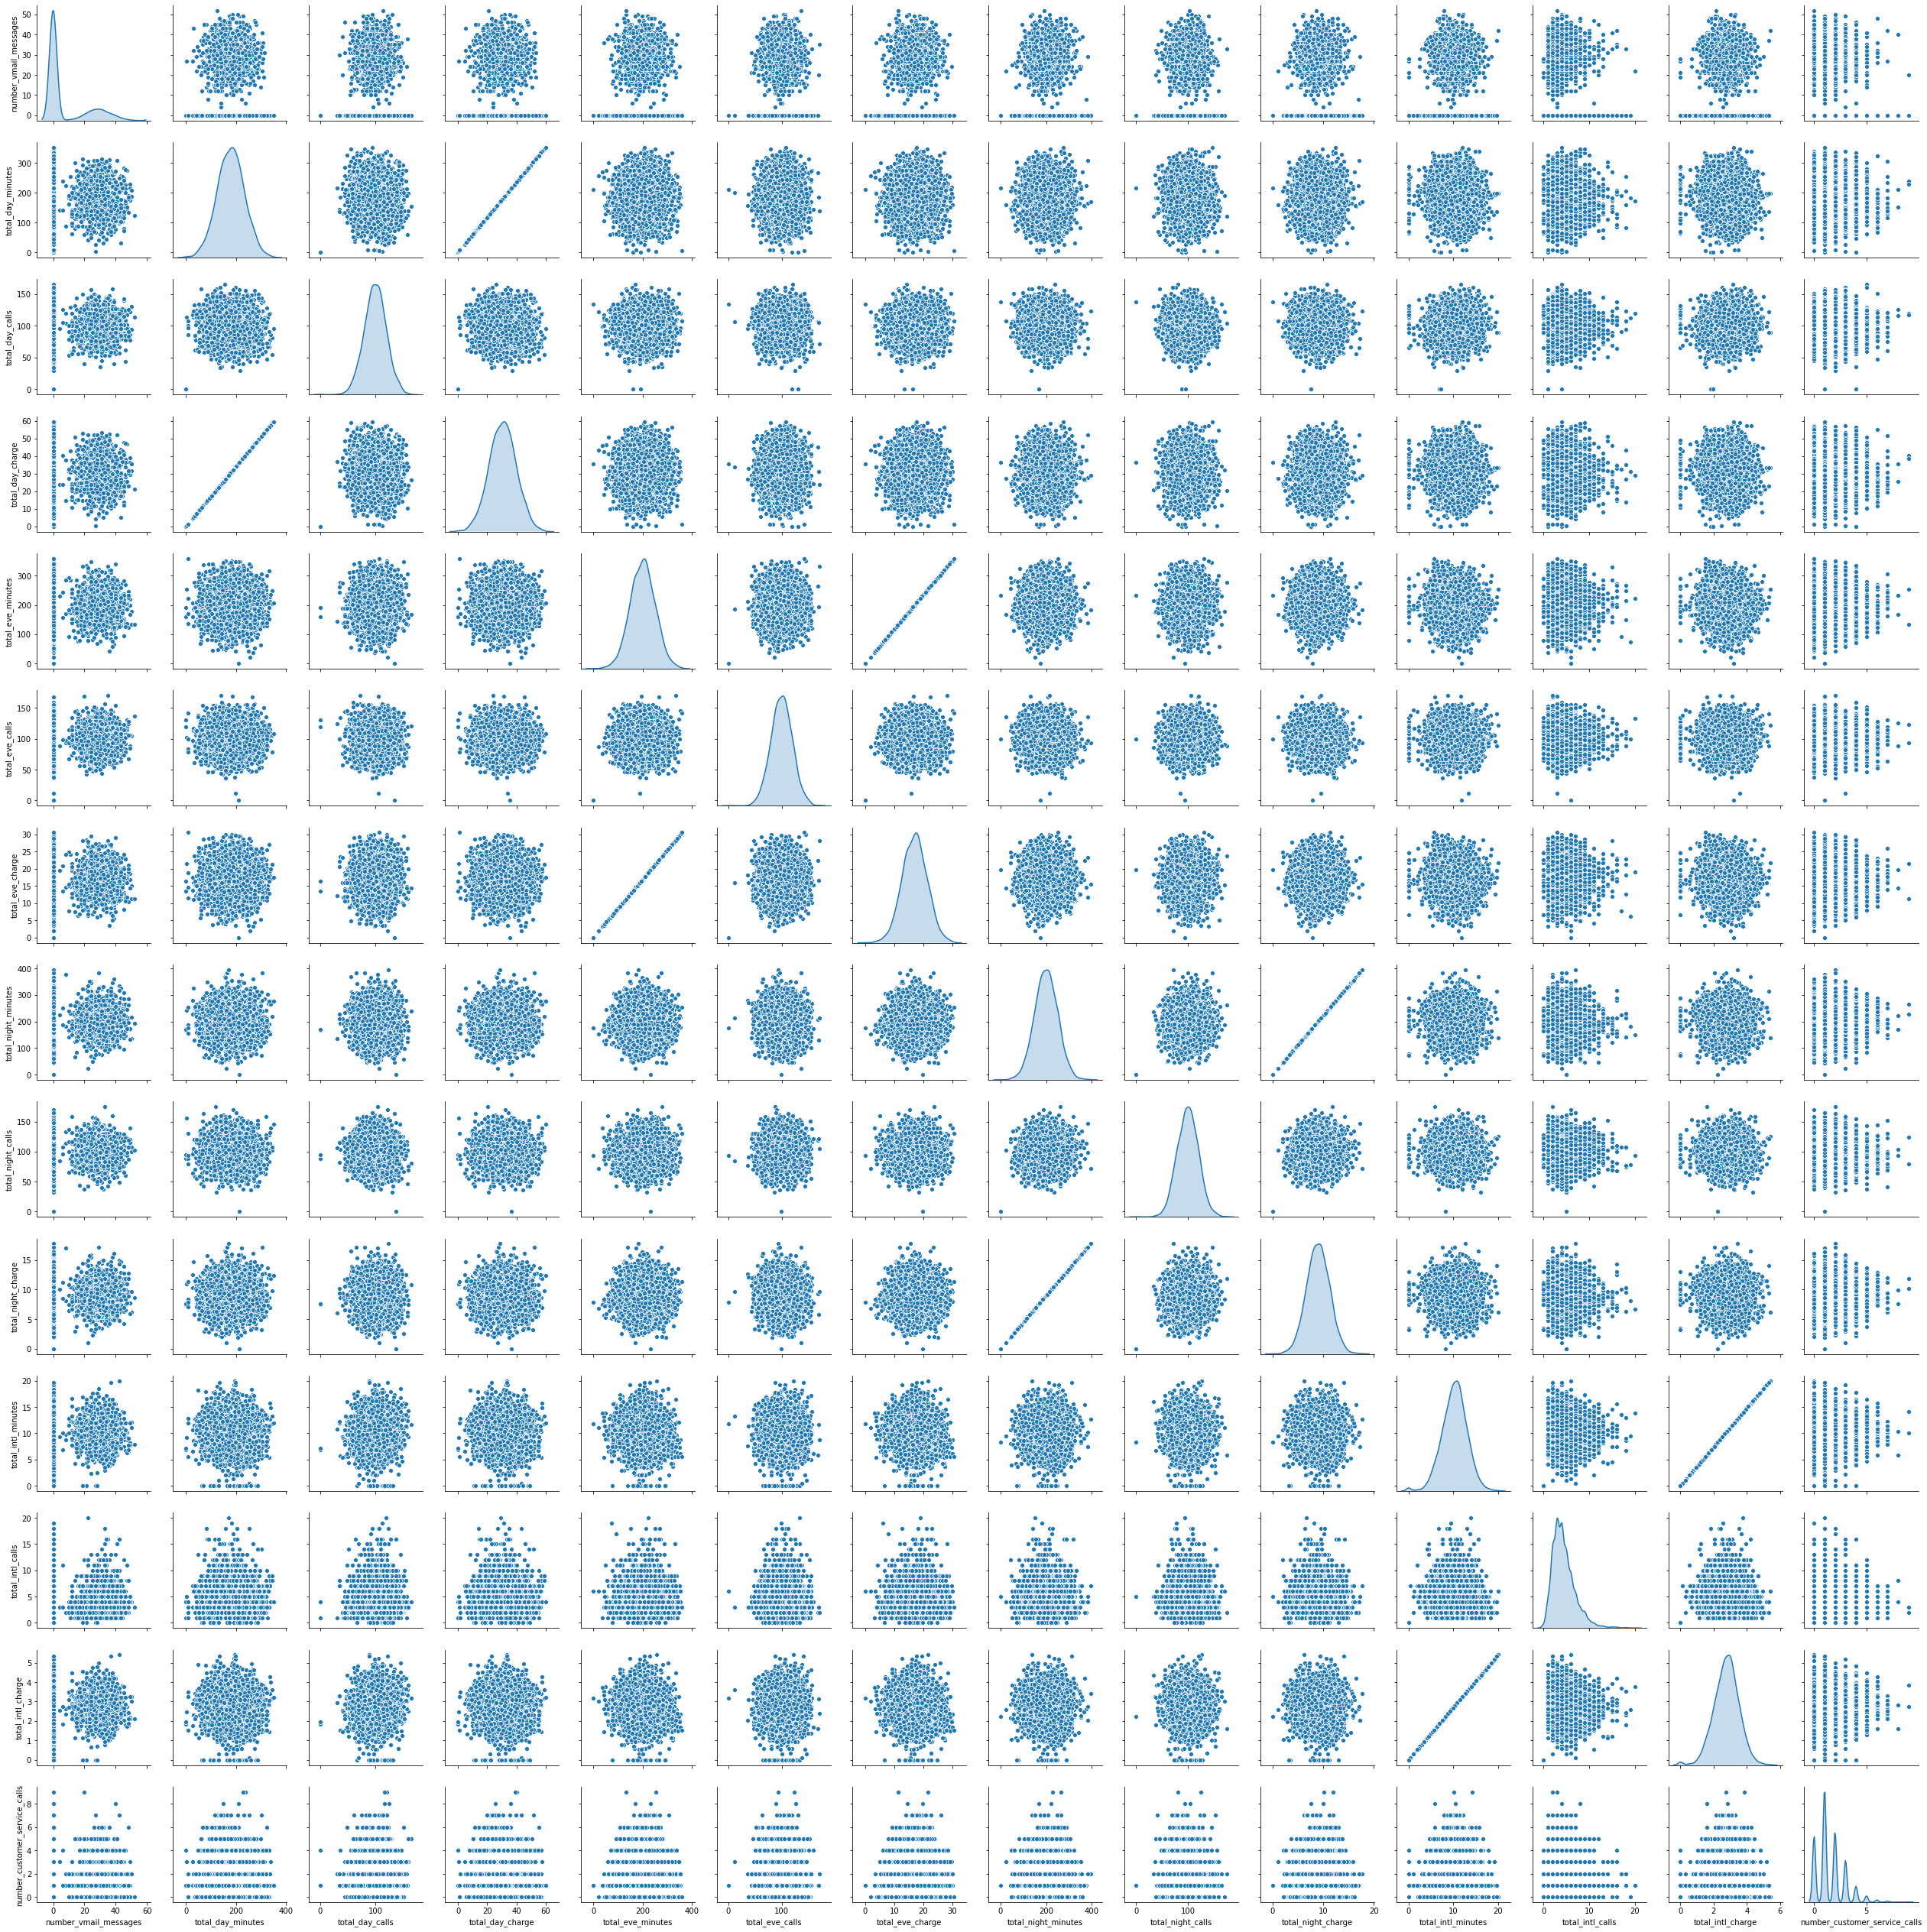

In [136]:
import seaborn as sns
sns.pairplot(train[['international_plan',
       'voice_mail_plan','number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn']], diag_kind='kde')

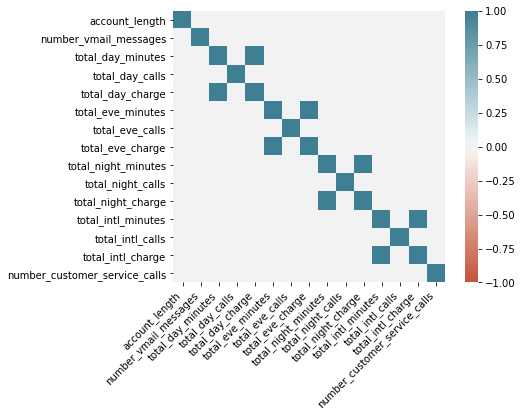

In [137]:


corr = train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

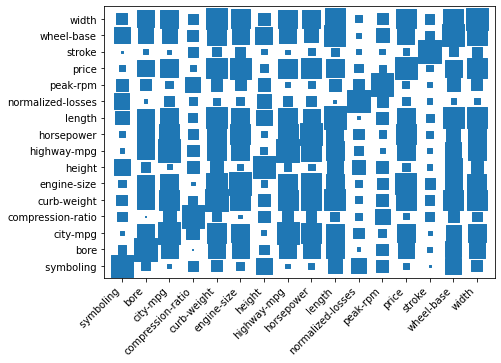

In [138]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
#columns = ['bore', 'stroke', 'compression-ratio', 'horsepower', 'city-mpg', 'price'] 
corr = data.corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)

## The above three plots are showing the co realtion between all parameters of the dataset

## If there are any outliers? (note them but don't remove them yet!)

In [139]:
train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


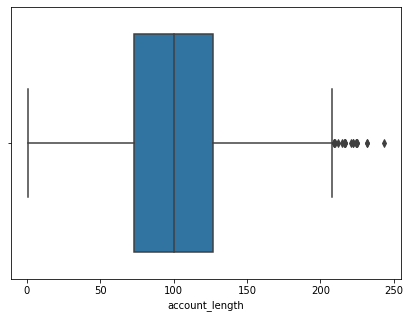

In [140]:
sns.boxplot(x=train['account_length'])

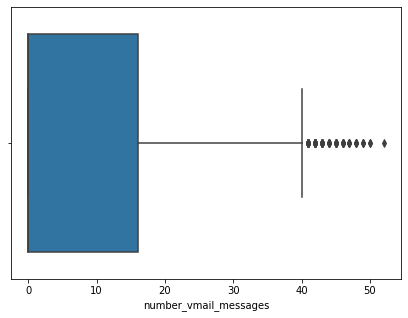

In [141]:
sns.boxplot(x=train['number_vmail_messages'])

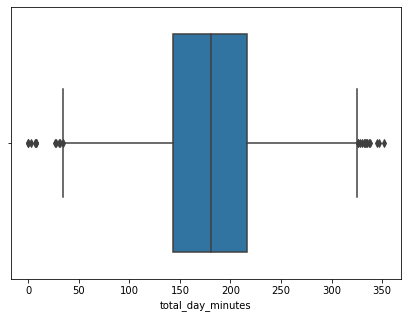

In [142]:
sns.boxplot(x=train['total_day_minutes'])

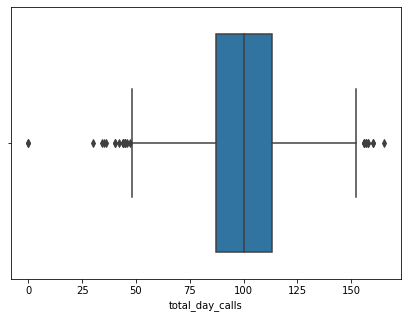

In [143]:
sns.boxplot(x=train['total_day_calls'])

## From the above box plots it can be clearly seen that there are outliers in the dataset and the dataset is not evenly distributed 

## The need for doing any relevant statistical tests (e.g., T-tests)

## ANOVA TEST IS DONE IN NEXT STEP

## Assessing Missing Values (but don't fill/impute them yet!)

### There is no missing value in the Dataset

<br>
<br> <font size="6" color=Blue>Surprises</font> <br/>
<br>

<br>
<br> <font size="6" color=Blue>Next Steps</font> <br/>
<br>

## Dealing with Missing Data; e.g., things like:

### There is No missing data in our dataset

## Transforming Data

## * Numerical:

### ** Normalize

In [144]:
numeric = train[['number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
from sklearn.preprocessing import MinMaxScaler
# fit scaler on training data
norm = MinMaxScaler().fit(numeric)
# transform training data
normal_numeric_data = norm.transform(numeric)
cols = numeric.columns.values
# normalized data to dataframe
normal_numeric_data = pd.DataFrame(data = normal_numeric_data, columns = cols)
normal_numeric_data.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,0.500000,0.459744,0.745455,0.459672,0.544114,0.605882,0.544204,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
1,0.000000,0.692461,0.690909,0.692436,0.337323,0.647059,0.337263,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
2,0.000000,0.851778,0.430303,0.851740,0.172279,0.517647,0.172233,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
3,0.000000,0.474253,0.684848,0.474230,0.412747,0.717647,0.412901,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
4,0.461538,0.620768,0.533333,0.620649,0.969942,0.635294,0.969876,0.538228,0.674286,0.538548,0.375,0.35,0.375926,0.333333


## *Categorical:

### ** Label encoder (ordinal)

In [145]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Categorical = train[['international_plan','voice_mail_plan','churn']]
Categorical = Categorical.apply(LabelEncoder().fit_transform)
Categorical.head(5)

,international_plan,voice_mail_plan,churn
0,0,1,0
1,0,0,0
2,1,0,0
3,1,0,0
4,0,1,0


## Feature Engineering (what columns/features can you make to add value & information to your data?) and Feature Selection like:

## *Numerical:

### **  Correlation ANOVA

We have already encoded the categorical Columns, so now we are just going to do the Numeric Feature Selection using ANOVA

In [146]:
import warnings
warnings.filterwarnings('ignore')
total_data = numeric
total_data['international_plan'] = Categorical.international_plan
total_data['voice_mail_plan'] = Categorical.voice_mail_plan
total_data['churn'] = Categorical.churn
total_data.head(5)

,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1,0
1,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0,0
2,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0,0
3,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0,0
4,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,1,0


Feature 0: 30.133387
Feature 1: 153.101652
Feature 2: 0.031118
Feature 3: 153.084723
Feature 4: 23.800096
Feature 5: 0.366393
Feature 6: 23.797432
Feature 7: 14.032573
Feature 8: 0.003956
Feature 9: 14.027386
Feature 10: 7.758674
Feature 11: 5.858407
Feature 12: 7.754311
Feature 13: 140.831230
Feature 14: 198.016516
Feature 15: 40.598683


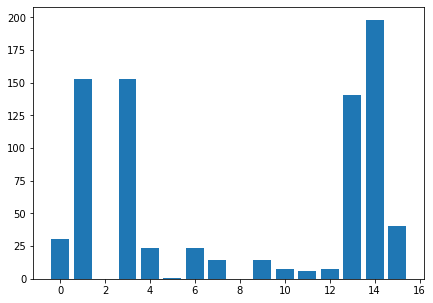

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
l = len(total_data.columns.values)
l = l - 1
X = total_data.iloc[:,0:l]
y = total_data.churn
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

### Selecting Final Features that will be used in the Machine Learning

In [148]:
score = []
score = fs.scores_
selected_feature = []
i = 0
while i<len(score):
    if score[i] > 15:
        selected_feature.append(i)
    i = i+1
print("These Feature Has been Selected: ",selected_feature)
print()
print("Getting indexes the Actual Data Columns:")
print()
i = 0
while i<len(total_data.columns):
    print("Index: ",i," ",total_data.columns[i])
    i = i+1
final_selected_df = pd.DataFrame()
final_selected_df['number_vmail_messages'] = total_data['number_vmail_messages']
final_selected_df['total_day_minutes'] = total_data['total_day_minutes']
final_selected_df['total_day_charge'] = total_data['total_day_charge']
final_selected_df['total_eve_minutes'] = total_data['total_eve_minutes']
final_selected_df['total_eve_charge'] = total_data['total_eve_charge']
final_selected_df['number_customer_service_calls'] = total_data['number_customer_service_calls']
final_selected_df['international_plan'] = total_data['international_plan']
final_selected_df['voice_mail_plan'] = total_data['voice_mail_plan']
final_selected_df['churn'] = total_data['churn']
final_selected_df.head(5)

These Feature Has been Selected:  [0, 1, 3, 4, 6, 13, 14, 15]

Getting indexes the Actual Data Columns:

Index:  0   number_vmail_messages
Index:  1   total_day_minutes
Index:  2   total_day_calls
Index:  3   total_day_charge
Index:  4   total_eve_minutes
Index:  5   total_eve_calls
Index:  6   total_eve_charge
Index:  7   total_night_minutes
Index:  8   total_night_calls
Index:  9   total_night_charge
Index:  10   total_intl_minutes
Index:  11   total_intl_calls
Index:  12   total_intl_charge
Index:  13   number_customer_service_calls
Index:  14   international_plan
Index:  15   voice_mail_plan
Index:  16   churn


,number_vmail_messages,total_day_minutes,total_day_charge,total_eve_minutes,total_eve_charge,number_customer_service_calls,international_plan,voice_mail_plan,churn
0,26,161.6,27.47,195.5,16.62,1,0,1,0
1,0,243.4,41.38,121.2,10.30,0,0,0,0
2,0,299.4,50.90,61.9,5.26,2,1,0,0
3,0,166.7,28.34,148.3,12.61,3,1,0,0
4,24,218.2,37.09,348.5,29.62,3,0,1,0


### Writing Final Data for Milestone 3

In [167]:
final_selected_df.to_csv("final_selected_df.csv",index = False)

<br>
<br> <center> <font size="7" color=Orange>Milestone 3: Machine Learning</font> </center> <br/>

# Since it's a Classification Problem
# Following  Classification algorithms are used
- Support Vector Machine
- Decision Tree Classification 
- Ridge Classification 
- SGD Classification
- KNEIGHBORSCLASSIFIER 
- Rabdom Forest Classification 
- Logistic Regression

## The classification reports, classification reports and traing and testing accuracy for each algorithm is drwan
## testing accuracy is used to compare each algorithm

# Libraries and Dataset Reading

In [150]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print("Reading the Dataset")
churn_data = pd.read_csv('final_selected_df.csv')
print()
print("Shape of Dataset is: ",churn_data.shape)

Reading the Dataset

Shape of Dataset is:  (4250, 9)


# Checking for Null Values

In [151]:
print("Null values per column are:")
print(churn_data.isnull().sum(axis = 0))
print("Filling out the Null values")
print("Spliting the Data into Input and output for the Model")

Null values per column are:
number_vmail_messages            0
total_day_minutes                0
total_day_charge                 0
total_eve_minutes                0
total_eve_charge                 0
number_customer_service_calls    0
international_plan               0
voice_mail_plan                  0
churn                            0
dtype: int64
Filling out the Null values
Spliting the Data into Input and output for the Model


# Train Test Splitting the dataset

In [152]:
X=churn_data.loc[:, churn_data.columns != 'churn']

In [153]:
y=churn_data['churn']

# Support Vector Machine

A support vector machine model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Support Vector Machine		   87 % 	   86 % 	  


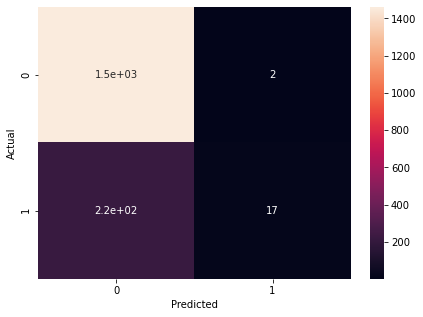

Confusion Matrix: SVM 
[[1461    2]
 [ 220   17]]
Classification Report:SVM 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1463
           1       0.89      0.07      0.13       237

    accuracy                           0.87      1700
   macro avg       0.88      0.54      0.53      1700
weighted avg       0.87      0.87      0.82      1700

('Support Vector Machine Classifier Accuracy:', 86.94117647058823)


In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print("A support vector machine model to predict whether a customer churn or not")
clf = SVC()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Support Vector Machine\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SVM "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SVM "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Support Vector Machine Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_SVM=LR_accuracy*100

# Logistic Regression

A Logistic Regression model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Logistic Regression		   86 % 	   86 % 	  


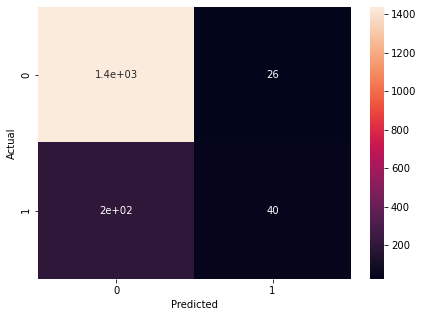

Confusion Matrix: Logistic Regression 
[[1437   26]
 [ 197   40]]
Classification Report:Logistic Regression 
              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1463
           1       0.61      0.17      0.26       237

    accuracy                           0.87      1700
   macro avg       0.74      0.58      0.60      1700
weighted avg       0.84      0.87      0.84      1700

('Logistic Regression Classifier Accuracy:', 86.88235294117646)


In [155]:
print("A Logistic Regression model to predict whether a customer churn or not")
clf = LogisticRegression()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Logistic Regression\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Logistic Regression "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Logistic Regression "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Logistic Regression Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Logistic=LR_accuracy*100

# Decision Tree Classifier 

A Decision Tree Classifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Decision Tree Classifier		   100 % 	   89 % 	  


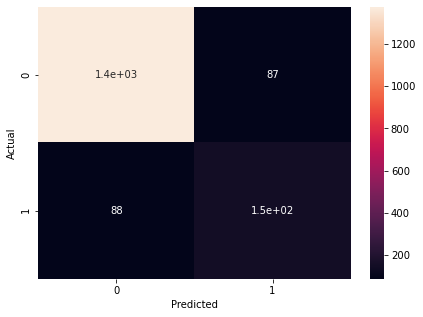

Confusion Matrix: Decision Tree Classifier 
[[1376   87]
 [  88  149]]
Classification Report:Decision Tree Classifier 
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1463
           1       0.63      0.63      0.63       237

    accuracy                           0.90      1700
   macro avg       0.79      0.78      0.79      1700
weighted avg       0.90      0.90      0.90      1700

('Decision Tree Classifier Accuracy:', 89.70588235294117)


In [156]:
print("A Decision Tree Classifier model to predict whether a customer churn or not")
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Decision Tree Classifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Decision Tree Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Decision Tree Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Decision Tree Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Decision=LR_accuracy*100

# Random Forest Classification

A Random Forest Classifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
Random Forest Classifier 		   100 % 	   93 % 	  


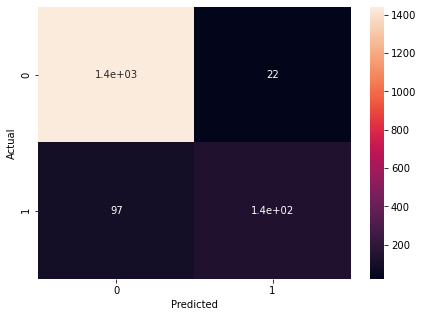

Confusion Matrix: Random Forest Classifier 
[[1441   22]
 [  97  140]]
Classification Report:Random Forest Classifier 
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1463
           1       0.86      0.59      0.70       237

    accuracy                           0.93      1700
   macro avg       0.90      0.79      0.83      1700
weighted avg       0.93      0.93      0.92      1700

('Random Forest Classifier Accuracy:', 93.0)


In [157]:
print("A Random Forest Classifier model to predict whether a customer churn or not")
clf = RandomForestClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("Random Forest Classifier \t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: Random Forest Classifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:Random Forest Classifier "))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("Random Forest Classifier Accuracy:" ,LR_accuracy*100))
Accuracy_Random=LR_accuracy*100

# Ridge Classification 

A RidgeClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
RidgeClassifier		   86 % 	   86 % 	  


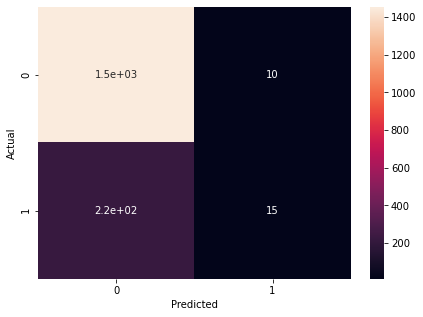

Confusion Matrix: RidgeClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:RidgeClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('RidgeClassifier Accuracy:', 86.3529411764706)


In [158]:
from sklearn.linear_model import RidgeClassifier
print("A RidgeClassifier model to predict whether a customer churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("RidgeClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: RidgeClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:RidgeClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("RidgeClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_RidgeClassifier=LR_accuracy*100

# SGD Classification

A SGDClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
SGDClassifier		   86 % 	   86 % 	  


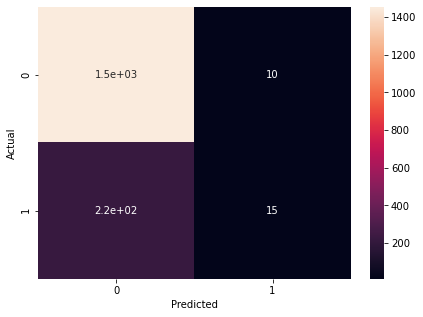

Confusion Matrix: SGDClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:SGDClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('SGDClassifier Accuracy:', 86.3529411764706)


In [159]:
from sklearn.linear_model import SGDClassifier
print("A SGDClassifier model to predict whether a customer churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("SGDClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: SGDClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:SGDClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("SGDClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_SGDClassifier=LR_accuracy*100


# K Neighbour Classification 

A KNeighborsClassifier model to predict whether a customer churn or not
	Model			Train Acc	Test Acc
KNeighborsClassifier		   86 % 	   86 % 	  


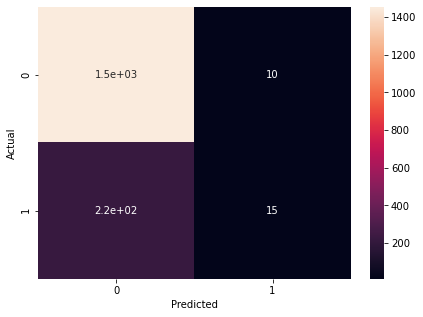

Confusion Matrix: KNeighborsClassifier 
[[1453   10]
 [ 222   15]]
Classification Report:KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1463
           1       0.60      0.06      0.11       237

    accuracy                           0.86      1700
   macro avg       0.73      0.53      0.52      1700
weighted avg       0.83      0.86      0.81      1700

('KNeighborsClassifier Accuracy:', 86.3529411764706)


In [160]:
from sklearn.neighbors import KNeighborsClassifier
print("A KNeighborsClassifier model to predict whether a customer churn or not")
clf = RidgeClassifier()
clf.fit(X_train, y_train.values.ravel())
y_true, y_pred = y_test, clf.predict(X_test)
print("\tModel\t\t\tTrain Acc\tTest Acc")
print("KNeighborsClassifier\t\t  ",int(clf.score(X_train,y_train)*100),"% \t  ", int(100*clf.score(X_test,y_test)),"% \t  ")
TrueResultslat=y_test
PredictedResultslat=clf.predict(X_test)
data = {'y_Actual':    y_test,
    'y_Predicted': PredictedResultslat
    }
df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrixf = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrixf, annot=True)
plt.show()
print(("Confusion Matrix: KNeighborsClassifier "))
print(confusion_matrix(y_test,PredictedResultslat))
print(("Classification Report:KNeighborsClassifier"))
print(classification_report(y_test,PredictedResultslat))
LR_accuracy = metrics.accuracy_score(y_test, PredictedResultslat)
print(("KNeighborsClassifier Accuracy:" ,LR_accuracy*100))
Accuracy_KNeighborsClassifier=LR_accuracy*100


# Combined Accuracy for each Algorithm

In [161]:
AA=pd.DataFrame()
AA['Algorithm']=[ 'SVM','Random Forest Classifier','Logistic Regression','Decision Tree Classifier','Ridge Classifier','SGD Classifier'
                ,'KNeighborsClassifier ']

In [162]:
AA['Accuracy (%)']=[Accuracy_SVM , Accuracy_Random,Accuracy_Logistic, Accuracy_Decision,Accuracy_RidgeClassifier
                   ,Accuracy_SGDClassifier,Accuracy_KNeighborsClassifier]

In [163]:
AA=AA.sort_values(['Accuracy (%)'])

In [164]:
AA

,Algorithm,Accuracy (%)
4,Ridge Classifier,86.352941
5,SGD Classifier,86.352941
6,KNeighborsClassifier,86.352941
2,Logistic Regression,86.882353
0,SVM,86.941176
3,Decision Tree Classifier,89.705882
1,Random Forest Classifier,93.000000


In [165]:
import plotly.express as px

In [172]:
fig = px.bar(AA, x='Algorithm', y='Accuracy (%)',title="Accuracy of each Classifier for Churn Predictions",color='Accuracy (%)')
fig.show()

# It can be seen that Random Forest Classification is giving best accuracy of 93%

# Code for Parameter Tuning SVM Classifier 

In [ ]:
print("Improving Model using Grid Search")
print()
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:

    print()
    print("Working with",tuned_parameters)
    clf = GridSearchCV(SVC(), tuned_parameters, scoring='%s_macro' % score)
    clf.fit(X_train, y_train.values.ravel())

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
